# Supervised Learning with scikit-learn


## Concepts and terminology

* **Supervised learning**: The task of inferring a target variable from predictor variables. For example, inferring the target variable 'presence of heart disease' from predictor variables such as 'age', 'sex', and 'smoker status'.


* **Classification task**: A supervised learning task is a classification task if the target variable consists of categories (e.g. 'click' or 'not', 'malignant' or 'benign' tumour).


* **Regression task**: A supervised learning task is a regression task if the target variable is a continuously varying variable (e.g. price of a house) or an ordered categorical variable such as 'quality rating of wine'.
k-Nearest Neighbors: An algorithm for classification tasks, in which a data point is assigned the label decided by a majority vote of its k nearest neighbors.


* **Preprocessing**: Any number of operations data scientists will use to get their data into a form more appropriate for what they want to do with it. For example, before performing sentiment analysis of twitter data, you may want to strip out any html tags, white spaces, expand abbreviations and split the tweets into lists of the words they contain.
Centering and Scaling: These are both forms of preprocessing numerical data, that is, data consisting of numbers, as opposed to categories or strings, for example; centering a variable is subtracting the mean of the variable from each data point so that the new variable's mean is 0; scaling a variable is multiplying each data point by a constant in order to alter the range of the data. See the body of the article for the importance of these, along with examples.




## Classification

In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records.

> Machine learning : Art and science of giving computers the ability to learn to make decisions from data without being explictly programmed. 

### Types of learning 


* Unsupervised learning : unlabeled data, we try to uncover hidden patterns from unlabeled data. Ex. Grouping customers into different categories based on their behaviour but we don't know in advance which are going to be these categories (this is called **clustering**). 


* Reinforcement learning : the agent interacts with an environment. The agent is able to optimize its behaviour depending on the environment -it learns-, due to a rewards/punishment system inspired from the behavioral psychology. It has a lot of applications: economics, games, genetics. Ex. AlphaGo 2015.


* Supervised learning : labeled data. We work with features and target variables -the labels-. The challenge here, is based on the features variables or predictor variables (or independent variables), try to predict the target variable (or dependent or response variable). IF:

        * > The target variable consists of categories --> classification problem
        * > The target variable is continous --> regression problem


### Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

* [X]Using labeled financial data to predict whether the value of a stock will go up or go down next week.
* [_]Using labeled housing price data to predict the price of a new house based on various features.
* [_]Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
* [_]Using labeled financial data to predict what the value of a stock will be next week.

### The classification challenge

#### k-nearest neighbours

The idea behind, is to predict the label of a data point by looking at the ‘k’ closest labeled data points. 


In [1]:
# Imports

import pandas as pd
import numpy as np

# Read file and import df from file

df = pd.read_csv("mldatasets/df_party.txt")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
Unnamed: 0           435 non-null int64
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(17), object(1)
memory usage: 61.2+ KB
None


,Unnamed: 0,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [2]:
df.values

array([[0, 'republican', 0, ..., 1, 0, 1],
       [1, 'republican', 0, ..., 1, 0, 1],
       [2, 'democrat', 0, ..., 1, 0, 0],
       ..., 
       [432, 'republican', 0, ..., 1, 0, 1],
       [433, 'republican', 0, ..., 1, 0, 1],
       [434, 'republican', 0, ..., 1, 0, 0]], dtype=object)

In [3]:
# Import pandas
import pandas as pd

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values # drop() method removes 'party' column, which contains labels, from the features

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Predict

In [4]:
# Load and create dataframe from file
X_new = pd.read_csv("mldatasets/X_new.txt")
print(X_new.info())
X_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
Unnamed: 0    1 non-null int64
0             1 non-null float64
1             1 non-null float64
2             1 non-null float64
3             1 non-null float64
4             1 non-null float64
5             1 non-null float64
6             1 non-null float64
7             1 non-null float64
8             1 non-null float64
9             1 non-null float64
10            1 non-null float64
11            1 non-null float64
12            1 non-null float64
13            1 non-null float64
14            1 non-null float64
15            1 non-null float64
dtypes: float64(16), int64(1)
memory usage: 216.0 bytes
None


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.322981,0.862084,0.310688,0.750776,0.538754,0.736589,0.521465,0.984811,0.012442,0.746899,0.990327,0.765476,0.132453,0.322978,0.281737,0.43129


In [5]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn in the next video.

### Measuring model performance --> Accuracy

In classification problems, accuracy is the commonly metric used. Accuracy is the fraction of correct predictions computed from the testing data. You usually split your dataset into training data, and testing data. Yo do not use your testing data for training, otherwise the model won't be able to generalize well. Testing data is a dataset not seen before by the model:

* You fit/train your data on the training set
* You make predictions on the testing set
* The compare predictions with the known labels

#### Model complexity

<img src="images/overfitting-underfitting.jpg" />


### The digits recognition dataset MNIST

In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects: 


* scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys. It is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the image:  

* On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

* Notice that you can access the keys of these **Bunch objects ** in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images']




dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

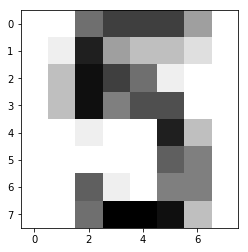

In [6]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [7]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors =7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.983333333333


In [8]:
X_train[0][10], y_train[0]

(16.0, 5)

### Overfitting and underfitting

** Careful: the X_train, X_test used in here, comes from the previous exercise. In Datacamp's course, these numpy arrays have different values.**

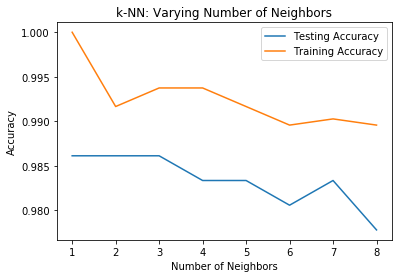

In [9]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Regression

In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.


### Loss function

<img src="images/overfitting-underfitting.jpg" />

### Linear regression on higher dimesions

Given the equation model

> $ y = a_{1}x_{1} + a_{2}x_{2} + b$

* To fit a linear regression model here, you need to specify 3 variables

** In the same way, if we have more features, we will have higher dimensions:**

> $ y = a_{1}x_{1} + a_{2}x_{2} +  a_{3}x_{3} + ... +  a_{n}x_{n} + b$

* Must specify coefficient for each feature and the variable b
* Scikit-learn API works exactly the same way:
* Pass two arrays: Features, and target


### Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. **Your job is to pick the one that is best framed as a regression problem**.

* [_] An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item --> outcome yes/no


* [_] A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant --> outcome benign/malignant


* [_] A restaurant using review data to ascribe positive or negative sentiment to a given review -> outcome: positive/negative


* [X] A bike share company using time and weather data to predict the number of bikes being rented at any given hour --> outcome: number of bikes (quantity)


### Importing data for supervised learning

In [10]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('mldatasets/gapminder.csv')

df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [11]:
# Create arrays for features and target variable
y = df['life']
X = df['fertility']

print("\n Before reshaping, X: \n", X[:3])
print("Datatype of X: ", type(X))

# Print the dimensions of X and y before reshaping
print("\nDimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print("\n After reshaping, X: \n", X[:3])
print("Datatype of X", type(X))

# Print the dimensions of X and y after reshaping
print("\nDimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


 Before reshaping, X: 
 0    2.73
1    6.43
2    2.24
Name: fertility, dtype: float64
Datatype of X:  <class 'pandas.core.series.Series'>

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)

 After reshaping, X: 
 [[ 2.73]
 [ 6.43]
 [ 2.24]]
Datatype of X <class 'numpy.ndarray'>

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### Exploring the Gapminder data



In [12]:
df.describe()


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [13]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


### Linear regression

y = ax + b

Where: 

* y = target
* x = single feature
* a, b = parameters of model

#### How do we choose a and b?

* Define an error function for any given line
* Choose the line that minimizes the error function
* Ordinary least squares (OLS): Minimize sum of squares of
residuals

In [14]:
df['fertility']
X_fertility = np.array(df['fertility'])
print(X_fertility)
print(X_fertility.shape)
X_fertility = X_fertility.reshape(-1, 1)
print(X_fertility.shape)

[ 2.73  6.43  2.24  1.4   1.96  1.41  1.99  1.89  2.38  1.83  1.42  1.82
  2.91  5.27  2.51  3.48  2.86  1.9   1.43  6.04  6.48  3.05  5.17  1.68
  6.81  1.89  2.43  5.05  5.1   1.91  4.91  1.43  1.5   1.89  3.76  2.73
  2.95  2.32  5.31  5.16  1.62  2.74  1.85  1.97  4.28  5.8   1.79  1.37
  4.19  1.46  4.12  5.34  5.25  2.74  3.5   3.27  1.33  2.12  2.64  2.48
  1.88  2.    2.92  1.39  2.39  1.34  2.51  4.76  1.5   1.57  3.34  5.19
  1.42  1.63  4.79  5.78  2.05  2.38  6.82  1.38  4.94  1.58  2.35  1.49
  2.37  2.44  5.54  2.05  2.9   1.77  2.12  2.72  7.59  6.02  1.96  2.89
  3.58  2.61  4.07  3.06  2.58  3.26  1.33  1.36  2.2   1.34  1.49  5.06
  5.11  1.41  5.13  1.28  1.31  1.43  7.06  2.54  1.42  2.32  4.79  2.41
  3.7   1.92  1.47  3.7   5.54  1.48  4.88  1.8   2.04  2.15  6.34  1.38
  1.87  2.07  2.11  2.46  1.86  5.88  3.85]
(139,)
(139, 1)


0.619244216774


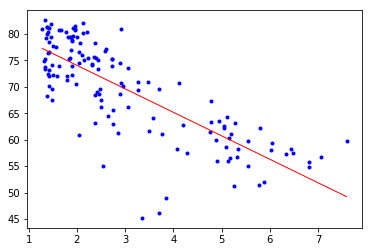

In [15]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot datapoints
plt.plot(df['fertility'], df['life'], color='blue', marker=".", linestyle='none')

# Plot regression line
plt.plot(prediction_space, y_pred, color='red', linewidth=1)
plt.show()


In [16]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [17]:
X = df.drop(["life", "Region"], axis=1).values
print(type(X))
print(X.shape)
print(X[:1])

y = df['life']

<class 'numpy.ndarray'>
(139, 8)
[[  3.48110590e+07   2.73000000e+00   1.00000000e-01   3.32894466e+00
    2.45962000e+01   1.23140000e+04   1.29904900e+02   2.95000000e+01]]


In [18]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430055
Root Mean Squared Error: 3.2476010800370267


### Cross validation motivation 

* Model performance is dependent on way the data is split
* Not representative of the model’s ability to generalize
* Solution: Cross-validation!

### 5-fold cross-validation 

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data. It uses R^2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average. The generalization is k-fold cross validation. 

<img src="images/k-folds-cross-validation.jpg" />

In [19]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))    

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]
Average 5-Fold CV Score: 0.8599627722793421


### K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. 

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)

In [20]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.871871278262
0.843612862013


In [21]:
%timeit cross_val_score(reg, X, y, cv=3)

100 loops, best of 3: 11.9 ms per loop


In [22]:
%timeit cross_val_score(reg, X, y, cv=10)

10 loops, best of 3: 38.3 ms per loop


### Regularized regression

#### Why regularize?

* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting: when you are working with a lot of features, that means your data lies in a high dimentional space, with large coeffiecients you can predict nearly everything. 
* Penalizing large coefficients: Regularization

### Ridge regression  --> **$L2$ norm**

If you took the sum of the squared values of the coefficients multiplied by some alpha, you would be computing the **$L2$ norm**

> ** Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2 $ **

* Alpha: Parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Hyperparameter tuning (More in Chapter 3)
* Alpha controls model complexity
* Alpha = 0: We get back OLS (Can lead to overfitting)
* Very high alpha: Can lead to underfitting


Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

* you will practice fitting ridge regression models over a range of different alphas, 
* and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha. 


In [23]:
def display_plot(cv_scores, cv_scores_std):
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # Create plot object
    ax.plot(alpha_space, cv_scores)
    # Calc the error 
    std_error = cv_scores_std / np.sqrt(10)
    # Set filling
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    # Set labels
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    # Set limits and scale
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    # Show plot
    plt.show()

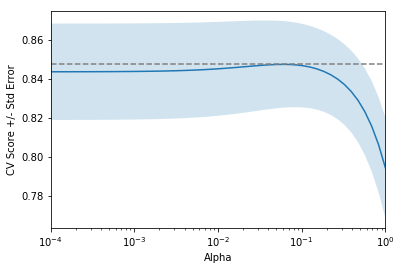

In [24]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


### Lasso regression --> **$L1$ norm**

This is also known as **$L1$ regularization** because the regularization term is the **$L1$ norm** of the coefficients.

* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0

> ** Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} |a_i| $ **

In [25]:
df_X =  df.drop(['life', 'Region'], axis=1)
X = df.drop(['life', 'Region'], axis=1).values
df_X_columns = df_X.columns
print(df_X.columns)
print(X.shape)
print(y.shape)

df_X.head()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')
(139, 8)
(139,)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


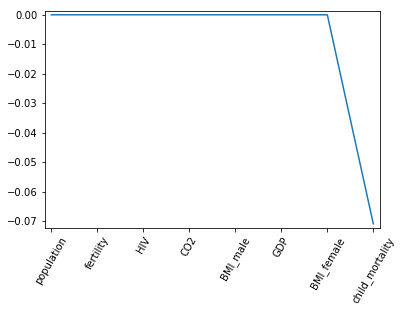

In [26]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.coef_

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_X_columns)), lasso_coef)
plt.xticks(range(len(df_X_columns)), df_X_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


## Fine-tuning your model

Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.

### How good is your model? 

Measuring model performance with accuracy is not always the most useful metrics: for instance in email spam detection problem -class imbalance problem: we have a considerable difference in frequency between labels-, we usually find that the 1% of the emails are spam. We could build a model that classifies all the emails as real, and get a 99% accuracy!! However that would be a naïve classifier which, having a great accuracy, would fail on the classifying purpose of its task. 

#### Confusion matrix


                             
|                      | **Predicted spam email**|   Predicted real email  |
|----------:-----------|-------------:-----------|-------------:-----------|
|  Actual: Spam email  |      True positive(*)   |      False negative     |
|  Actual: Real email  |      False positive     |      True negative(*)   |

(*) Correctly labeled

Usually the class of interest is called the positive class. As we try to detect spam, the positive class is the spam detection. Accuracy can be calculated from the confusion matrix, by adding the diagonal and divide it by each element of it: 

> $ \frac{(tp + tn)}{(tp + tn + fp + fn)} $


#### Precision

> $ \frac{tp}{tp + tn}$ 

#### Recall or sensitivity

> $ \frac{tp}{tp + fn}$

#### F1 score (harmonic mean of precisson and sensitivity)

> $ \frac{2 * precision * recall}{(precison + recall)}$


In [27]:
df_pima_indians = pd.read_csv("datasets/pima_indians.txt")
df_pima_indians.head()

,index,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [28]:
X = df_pima_indians.drop(["index", "age", "diabetes"], axis=1).values

In [29]:
y = df_pima_indians["diabetes"].values

In [30]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors =6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[180  26]
 [ 58  44]]
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       206
          1       0.63      0.43      0.51       102

avg / total       0.71      0.73      0.71       308



### Logistic regression --> Binary classification

**Logistic regression** is used in classification problems, not in regression problems. The logistic function is:

<img src="images/logistic_function.jpg" />

> ${\displaystyle f(x)={\frac {L}{1+e^{-k(x-x_{0})}}}}$

Where:

* e = the natural logarithm base (also known as Euler's number),
* x0 = the x-value of the sigmoid's midpoint,
* L = the curve's maximum value, and
* k = the steepness of the curve

Due to its nature, the logistic regression outputs probabilities: 

* If the probability 'p' is greater than 0.5  --->   the data is labeled '1'
* If the probability 'p' is less than 0.5     --->   the data is labeled as '0'

So we can establish a decision boundary. 

<img src="images/decision_boundary.jpg" />


By default, logistic regression threshold = 0.5

* Not specific to logistic regression
* k-NN classifiers also have thresholds
* What happens if we vary the threshold?

<img src="images/roc-curve.jpg" />


In [31]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.65      0.67       102

avg / total       0.78      0.79      0.78       308



### Plotting an ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

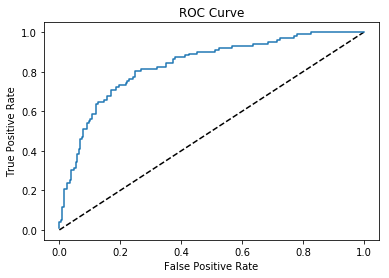

In [32]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision-recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. Choose the one statement that is not true.

<img src="images/precision-recall_curve.jpg" />

* [_] A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.

* [_]Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.

* [_]When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

> Notice how a high precision corresponds to a low recall: The classifier has a high threshold to ensure the positive predictions it makes are correct, which means it may miss some positive labels that have lower probabilities.

* [X]Precision and recall take true negatives into consideration.

> True negatives do not appear at all in the definitions of precision and recall.

### Given the ROC Curve, can we get a metric of interest? 

Well, the larger area under the ROC curve, the better the model. If we had a model with a single point at (0, 1), that would indicate a true positive, and that would be a good model, for this reason, all the **area under the curve aka AUC** can be use as a performance metric. 

<img src="images/area_under_roc_curve.jpg" />

### AUC computation

In [33]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
# print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8328574148105845
AUC scores computed using 5-fold cross-validation: [ 0.805       0.8112963   0.81833333  0.86490566  0.85433962]


### Hyperparameter tuning

* Linear regression: Choosing parameters
* Ridge/lasso regression: Choosing alpha
* k-Nearest Neighbors: Choosing n_neighbors
* Parameters like alpha and k: Hyperparameters
* Hyperparameters cannot be learned by fi!ing the model

#### Choosing the correct hyperparameter

Try a bunch of different hyperparameter values

* Fit all of them separately
* See how well each performs
* Choose the best performing one
* It is essential to use cross-validation --> Grid search cross validation

<img src="images/grid_search.jpg" />



### Hyperparameter tuning with GridSearchCV

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: $C$ which controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.

In [36]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.7786458333333334


Good job! It looks like a 'C' of 3.727 results in the best performance.

### Hyperparameter tuning with RandomizedSearchCV

In [55]:
X = pd.read_csv("datasets/df_diabetes.txt", index_col=0)
print(X.shape)
X.head()

(768, 8)


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35.00000,155.548223,33.6,0.627,50
1,1,85,66,29.00000,155.548223,26.6,0.351,31
2,8,183,64,29.15342,155.548223,23.3,0.672,32
3,1,89,66,23.00000,94.000000,28.1,0.167,21
4,0,137,40,35.00000,168.000000,43.1,2.288,33


In [83]:
df = pd.read_csv("datasets/df_diabetes_labels.txt", index_col=0, names=['index', 'diabetes'])
y = pd.Series(df['diabetes'].values)
print(type(y), y.shape)
y.head()

<class 'pandas.core.series.Series'> (768,)


0    1
1    0
2    1
3    0
4    1
dtype: int64

In [81]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 8}
Best score is 0.7252604166666666


### Hold-out set reasoning

You want to be absolutely certain about your model's ability to generalize to unseen data.  The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

In [85]:
c_space = np.logspace(-5, 8, 15)
c_space

array([  1.00000000e-05,   8.48342898e-05,   7.19685673e-04,
         6.10540230e-03,   5.17947468e-02,   4.39397056e-01,
         3.72759372e+00,   3.16227766e+01,   2.68269580e+02,
         2.27584593e+03,   1.93069773e+04,   1.63789371e+05,
         1.38949549e+06,   1.17876863e+07,   1.00000000e+08])

In [86]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.43939705607607948, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


### Hold-out set in practice II: Regression

#### Regularized regression  --> elastic net (linear combination of $L1$ and $L2$)

Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the **elastic net**. In **elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:**

> $a∗L1+b∗L2$

In [93]:
df = pd.read_csv('mldatasets/gapminder.csv')
X = df.drop(["life", "Region"], axis=1).values
y = df['life']

In [94]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coord

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


## Preprocessing and pipelines

This chapter will introduce the notion of pipelines and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Pre-processing techniques will be then be introduced as a way to enhance model performance and pipelines will be the glue that ties together concepts in the prior chapters.

### Dealing with categorical features

** Scikit-learn will not accept categorical features by default**: 

* Need to encode categorical features numerically
* Convert to ‘dummy variables’
* 0: Observation was NOT that category
* 1: Observation was that category

** Dealing with categorical features in Python**

* scikit-learn: OneHotEncoder()
* pandas: get_dummies()


### Exploring categorical features

Exploratory data analysis should always be the precursor to model building

In [98]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('datasets/gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


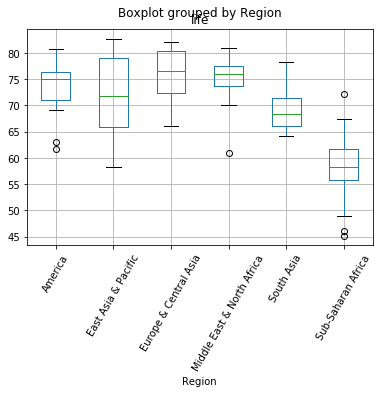

In [99]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

### Creating dummy variables

Since scikit-learn does not accept non-numerical features, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [100]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### Regression with categorical features --> Ridge()

In [107]:
X.shape
X = df_region.values
X = df_region.drop(["life"], axis=1).values
X.shape

(139, 13)

In [108]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


### Handling missing data  --> dropping missing data

You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [118]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('datasets/df_party.csv', index_col=0)
df.head()
X.shape

(139, 13)

In [115]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

Having set up the pipeline steps, you can now use it for classification.

In [116]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

### Imputing missing data in a ML Pipeline II



In [117]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

ValueError: Unknown label type: 'continuous'

### Centering and scaling your data